<a href="https://colab.research.google.com/github/excelasaph/linear_regression_model/blob/master/summative/linear_regression/multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Linear Regression Task

**Objective:**

You will be working on linear regression algorithms in the following tasks, focusing on a specific use case.

**Use Case:**

* Find a use case that aligns with your mission.
* **Important:**
    * The use case must **NOT** be generic.
    * The use case must **NOT** be the house prediction use case (covered extensively in class). Choosing this use case will result in an immediate zero grade for the entire assignment.

**Tasks:**

1. **Find a Dataset:**
   * Find a dataset related to your chosen use case.
   * Explore sources like Kaggle, Google Datasets, and data.gov.
   * The dataset **MUST** be something other than house price prediction.

2. **Build and Optimize a Linear Regression Model:**
   * Create and optimize a linear regression model using gradient descent.
   * Utilize the scikit-learn library.

3. **Plot the Loss Curve:**
   * Plot the loss curve for both test and train data.

4. **Compare Models:**
   * Compare the performance of:
      * Linear regression model
      * Decision trees
      * Random forest
   * Include the code for all three models.

5. **Save the Best Model:**
   * Save the best-performing model based on the loss metric.

6. **Create a Prediction Script:**
   * Create a script that uses the best model to make a prediction that will be used in Task 2.

## Use Case: Predicting Student GPA

**Goal:** Predicting the GPA of students based on various factors such as study time, parental education, and extracurricular activities to provide actionable insights for educators to improve student performance.

**Why This Use Case?**

This use case is directly aligned with my mission in education, which is to improve student outcomes. Predicting GPA helps in:

* Identifying students who may require additional academic support and intervention.
* Enabling more personalized learning pathways.
* Understanding the correlation between various features and GPA to help educators focus on the most influential factors for improvement.

**Why is this Use Case Non-Generic?**

This use case focuses on personalized academic improvement rather than general academic performance predictions. It targets specific educational interventions for student success, which is critical for data-driven decision-making in educational contexts.

## Student Performance Dataset

This dataset contains comprehensive information on 2,392 high school students, detailing their demographics, study habits, parental involvement, extracurricular activities, and academic performance.

## Dataset Description

**Student ID**

* **StudentID:** A unique identifier assigned to each student (1001 to 3392).

**Demographic Details**

* **Age:** The age of the students ranges from 15 to 18 years.
* **Gender:** Gender of the students, where 0 represents Male and 1 represents Female.
* **Ethnicity:** The ethnicity of the students, coded as follows:
    * 0: Caucasian
    * 1: African American
    * 2: Asian
    * 3: Other
* **ParentalEducation:** The education level of the parents, coded as follows:
    * 0: None
    * 1: High School
    * 2: Some College
    * 3: Bachelor's
    * 4: Higher

**Study Habits**

* **StudyTimeWeekly:** Weekly study time in hours, ranging from 0 to 20.
* **Absences:** Number of absences during the school year, ranging from 0 to 30.
* **Tutoring:** Tutoring status, where 0 indicates No and 1 indicates Yes.

**Parental Involvement**

* **ParentalSupport:** The level of parental support, coded as follows:
    * 0: None
    * 1: Low
    * 2: Moderate
    * 3: High
    * 4: Very High

**Extracurricular Activities**

* **Extracurricular:** Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
* **Sports:** Participation in sports, where 0 indicates No and 1 indicates Yes.
* **Music:** Participation in music activities, where 0 indicates No and 1 indicates Yes.
* **Volunteering:** Participation in volunteering, where 0 indicates No and 1 indicates Yes.

**Academic Performance**

* **GPA:** Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.

**Target Variable: Grade Class**

* **GradeClass:** Classification of students' grades based on GPA:
    * 0: 'A' (GPA >= 3.5)
    * 1: 'B' (3.0 <= GPA < 3.5)
    * 2: 'C' (2.5 <= GPA < 3.0)
    * 3: 'D' (2.0 <= GPA < 2.5)
    * 4: 'F' (GPA < 2.0)

### Mounting Google Drive to access data files stored in my Drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Importing all necessary libraries for data analysis, visualization, and machine learning, including **pandas, NumPy, Matplotlib, Seaborn, scikit-learn, and joblib.**

In [3]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import joblib

### Loading the student performance data from a CSV file stored in Google Drive into a pandas DataFrame named **adv**.

In [4]:
path = "Data/Student_performance_data _.csv"
adv = pd.read_csv(f'/content/drive/MyDrive/ML_Summative/{path}')

### Displaying the first few rows of the DataFrame **adv** to get an overview of the data.

In [5]:
# Print some part of the dataset.
adv.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


### Getting information about the DataFrame **adv**, including the data types, non-null values, and memory usage.

In [6]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### Checking for missing values **(NaN)** in each column of the DataFrame **adv** and displaying the count of missing values.

In [7]:
adv.isnull().sum()

,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


### Generating descriptive statistics for the numerical columns in the DataFrame **adv**, including **count, mean, standard deviation, min, max, and quartiles.**

In [8]:
adv.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


### Handling missing values by filling them with the median value of each respective column in the DataFrame **adv**

In [9]:
adv = adv.fillna(adv.median())

In [10]:
adv.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [11]:
adv.dtypes

,0
StudentID,int64
Age,int64
Gender,int64
Ethnicity,int64
ParentalEducation,int64
StudyTimeWeekly,float64
Absences,int64
Tutoring,int64
ParentalSupport,int64
Extracurricular,int64


### Calculating and visualizing the correlation matrix between numerical features in the DataFrame **adv** using a heatmap.

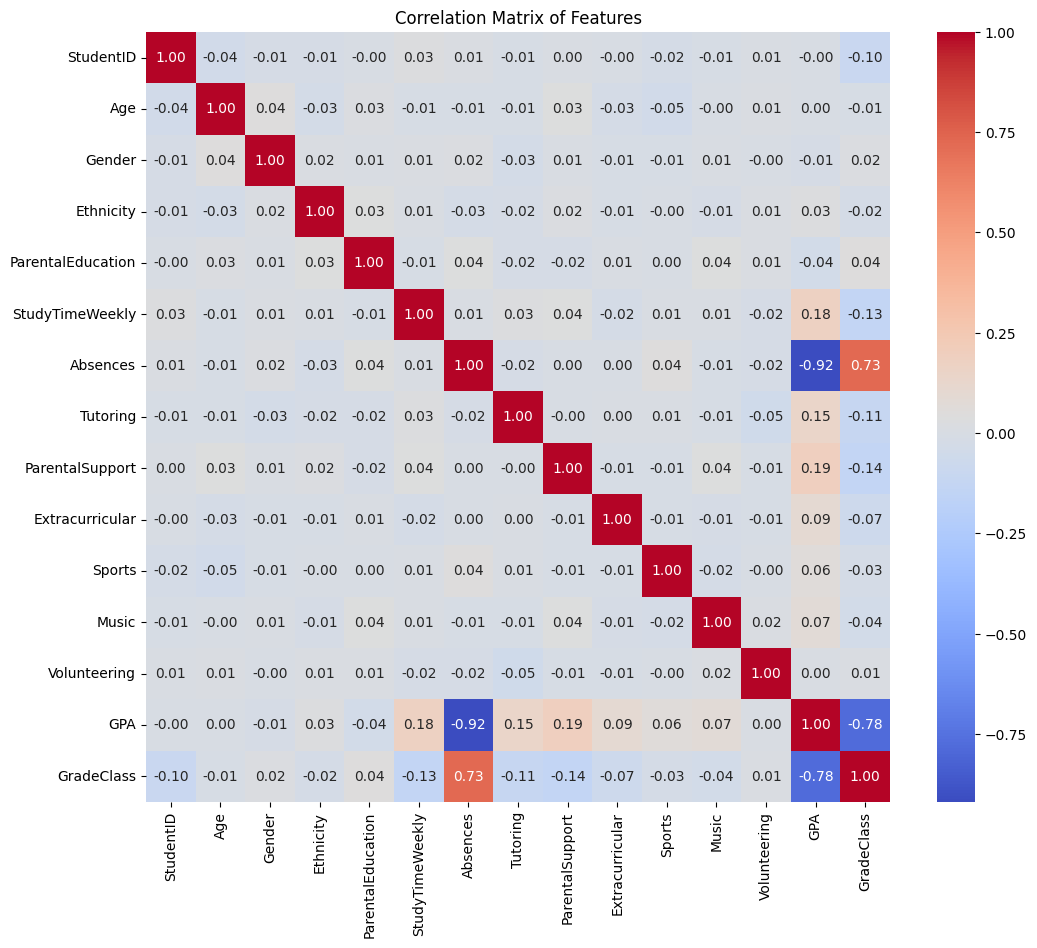

In [12]:
correlation_matrix = adv.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

### Visualizing the correlation between **GradeClass** and **GPA** using a box plot to show the distribution of GPA for each grade class

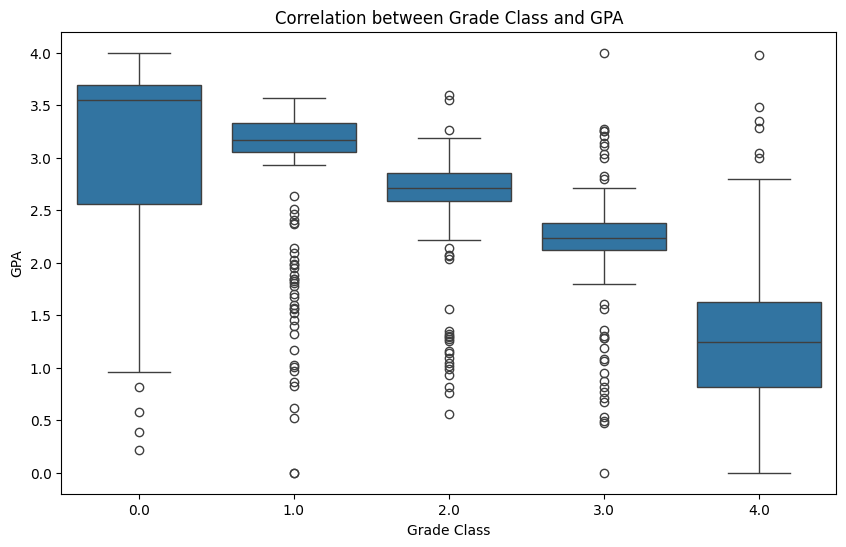

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GradeClass', y='GPA', data=adv)
plt.title('Correlation between Grade Class and GPA')
plt.xlabel('Grade Class')
plt.ylabel('GPA')
plt.show()

Visualizing the distribution of **GPA** scores using a histogram to show the frequency of different GPA ranges

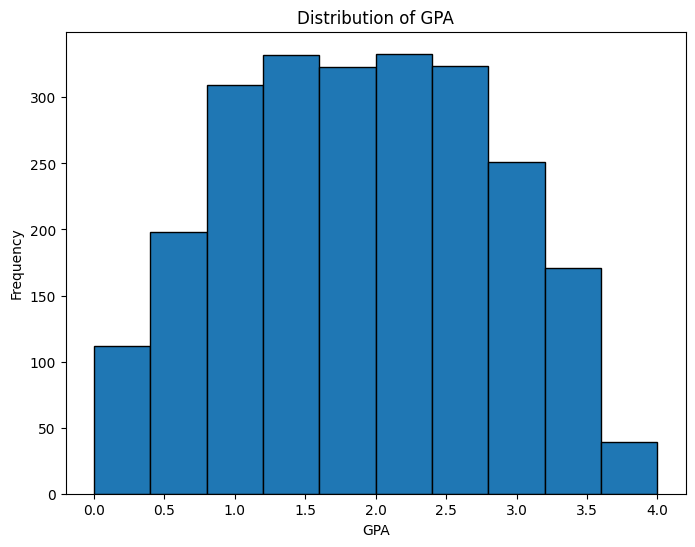

In [31]:
plt.figure(figsize=(8, 6))
plt.hist(adv['GPA'], bins=10, edgecolor='black')
plt.title('Distribution of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

### Selecting features and target variable for the machine learning models.

### Features include **Study Time Weekly, Absences, Parental Support, Tutoring, Extracurricular, Age, Gender, Ethnicity, ParentalEducation', 'Sports, Music, Volunteering**, while the target is **GPA.**

In [13]:
features = adv[['StudyTimeWeekly', 'Absences', 'ParentalSupport', 'Tutoring', 'Extracurricular', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Sports', 'Music', 'Volunteering']]
target = adv['GPA']

### Initializing a **StandardScaler** object for feature scaling to standardize the features before training the models.

In [14]:
scaler = StandardScaler()

### Splitting the data into **training** and **testing** sets using train_test_split.

### Applying **feature scaling** to the training and testing features using the StandardScaler

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=64)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Initializing a **Stochastic Gradient Descent (SGD)** Regressor model with specified parameters for **loss function, maximum iterations, tolerance, and random state.**

In [16]:
model = SGDRegressor(loss='squared_error', max_iter=1000, tol=1e-3, random_state=64)

### Training the SGD Regressor model using **gradient descent** and recording the training and testing losses during each epoch.

### Plotting the **loss curve** to visualize the model's convergence.

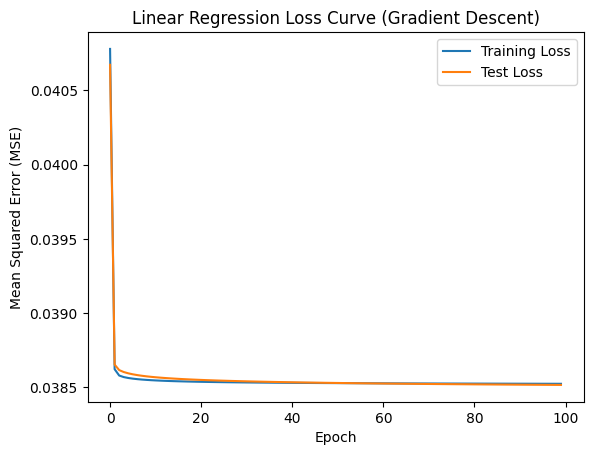

In [17]:
train_losses = []
test_losses = []

for epoch in range(100):
    model.partial_fit(X_train_scaled, y_train)

    # Predict on train and test sets
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Calculate and store losses
    train_loss = mean_squared_error(y_train, y_train_pred)
    test_loss = mean_squared_error(y_test, y_test_pred)

    train_losses.append(train_loss)
    test_losses.append(test_loss)

plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Linear Regression Loss Curve (Gradient Descent)')
plt.legend()
plt.show()

### Initializing and training a **Decision Tree Regressor** model using the scaled training data.

In [18]:
tree_model = DecisionTreeRegressor(random_state=64)
tree_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=64)

### Initialize and train a **Random Forest Regressor** model using the scaled training data.

In [19]:
forest_model = RandomForestRegressor(random_state=64)
forest_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=64)

### Making predictions on the scaled testing data using the trained **Linear Regression, Decision Tree, and Random Forest models**

In [20]:
sgd_predictions = model.predict(X_test_scaled)
tree_predictions = tree_model.predict(X_test_scaled)
forest_predictions = forest_model.predict(X_test_scaled)

### Evaluating the performance of the three models by calculating and printing the **Mean Squared Error (MSE)** and **R-squared values** for each model.

In [21]:
sgd_mse = mean_squared_error(y_test, sgd_predictions)

tree_mse = mean_squared_error(y_test, tree_predictions)
forest_mse = mean_squared_error(y_test, forest_predictions)

sgd_r2 = r2_score(y_test, sgd_predictions)
tree_r2 = r2_score(y_test, tree_predictions)
forest_r2 = r2_score(y_test, forest_predictions)

print("Linear Regression (Gradient Descent) - MSE:", sgd_mse, "R-squared:", sgd_r2)
print("Decision Tree - MSE:", tree_mse, "R-squared:", tree_r2)
print("Random Forest - MSE:", forest_mse, "R-squared:", forest_r2)

Linear Regression (Gradient Descent) - MSE: 0.03851727791492856 R-squared: 0.9542594855218488
Decision Tree - MSE: 0.11681973276384083 R-squared: 0.8612727854335932
Random Forest - MSE: 0.05439504677743223 R-squared: 0.9354041209724604


### Defining a function **`find_best_model`** to determine the best-performing model based on MSE and R-squared values.

In [22]:
def find_best_model(models, X_test, y_test):

    results = {}
    for model_name, model in models.items():
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        results[model_name] = {'MSE': mse, 'R-squared': r2}

    # Find the model with the lowest MSE and highest R-squared
    best_model_name = min(results, key=lambda k: (results[k]['MSE'], -results[k]['R-squared']))
    best_model = models[best_model_name]

    return best_model_name, best_model, results

In [23]:
models = {
       'Linear Regression (Gradient Descent)': model,
       'Decision Tree': tree_model,
       'Random Forest': forest_model,
   }

In [24]:
best_model_name, best_model, results = find_best_model(models, X_test_scaled, y_test)

In [25]:
print("Best Model:", best_model)
print("Best Model Name:", best_model_name)
print("Evaluation Metrics:", results)


Best Model: SGDRegressor(random_state=64)
Best Model Name: Linear Regression (Gradient Descent)
Evaluation Metrics: {'Linear Regression (Gradient Descent)': {'MSE': 0.03851727791492856, 'R-squared': 0.9542594855218488}, 'Decision Tree': {'MSE': 0.11681973276384083, 'R-squared': 0.8612727854335932}, 'Random Forest': {'MSE': 0.05439504677743223, 'R-squared': 0.9354041209724604}}


### Saving the **best-performing model** and the **StandardScaler** object to disk using `joblib` for use in FastAPI

In [26]:
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']